In [59]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [60]:
from pathlib import Path
import matplotlib.pyplot as plt


from td.trackdata.dataset import TrackData
import plotly_express as px
import plotly.graph_objects as go
import torch 

import lightning as L

from td.model.model_pl import MLPL 
from torch.utils.data import DataLoader
import numpy as np
from td.utils.cfg import UserConfig

In [61]:
user_cfg = UserConfig("mohit").user_cfg

In [62]:
train_dataset = TrackData(user_cfg, fold="train")
test_dataset = TrackData(user_cfg, fold="test")
valid_dataset = TrackData(user_cfg, fold="valid")

train_dl = DataLoader(train_dataset, batch_size=128)
test_dl = DataLoader(test_dataset, batch_size=128)
valid_dl = DataLoader(valid_dataset, batch_size=128)

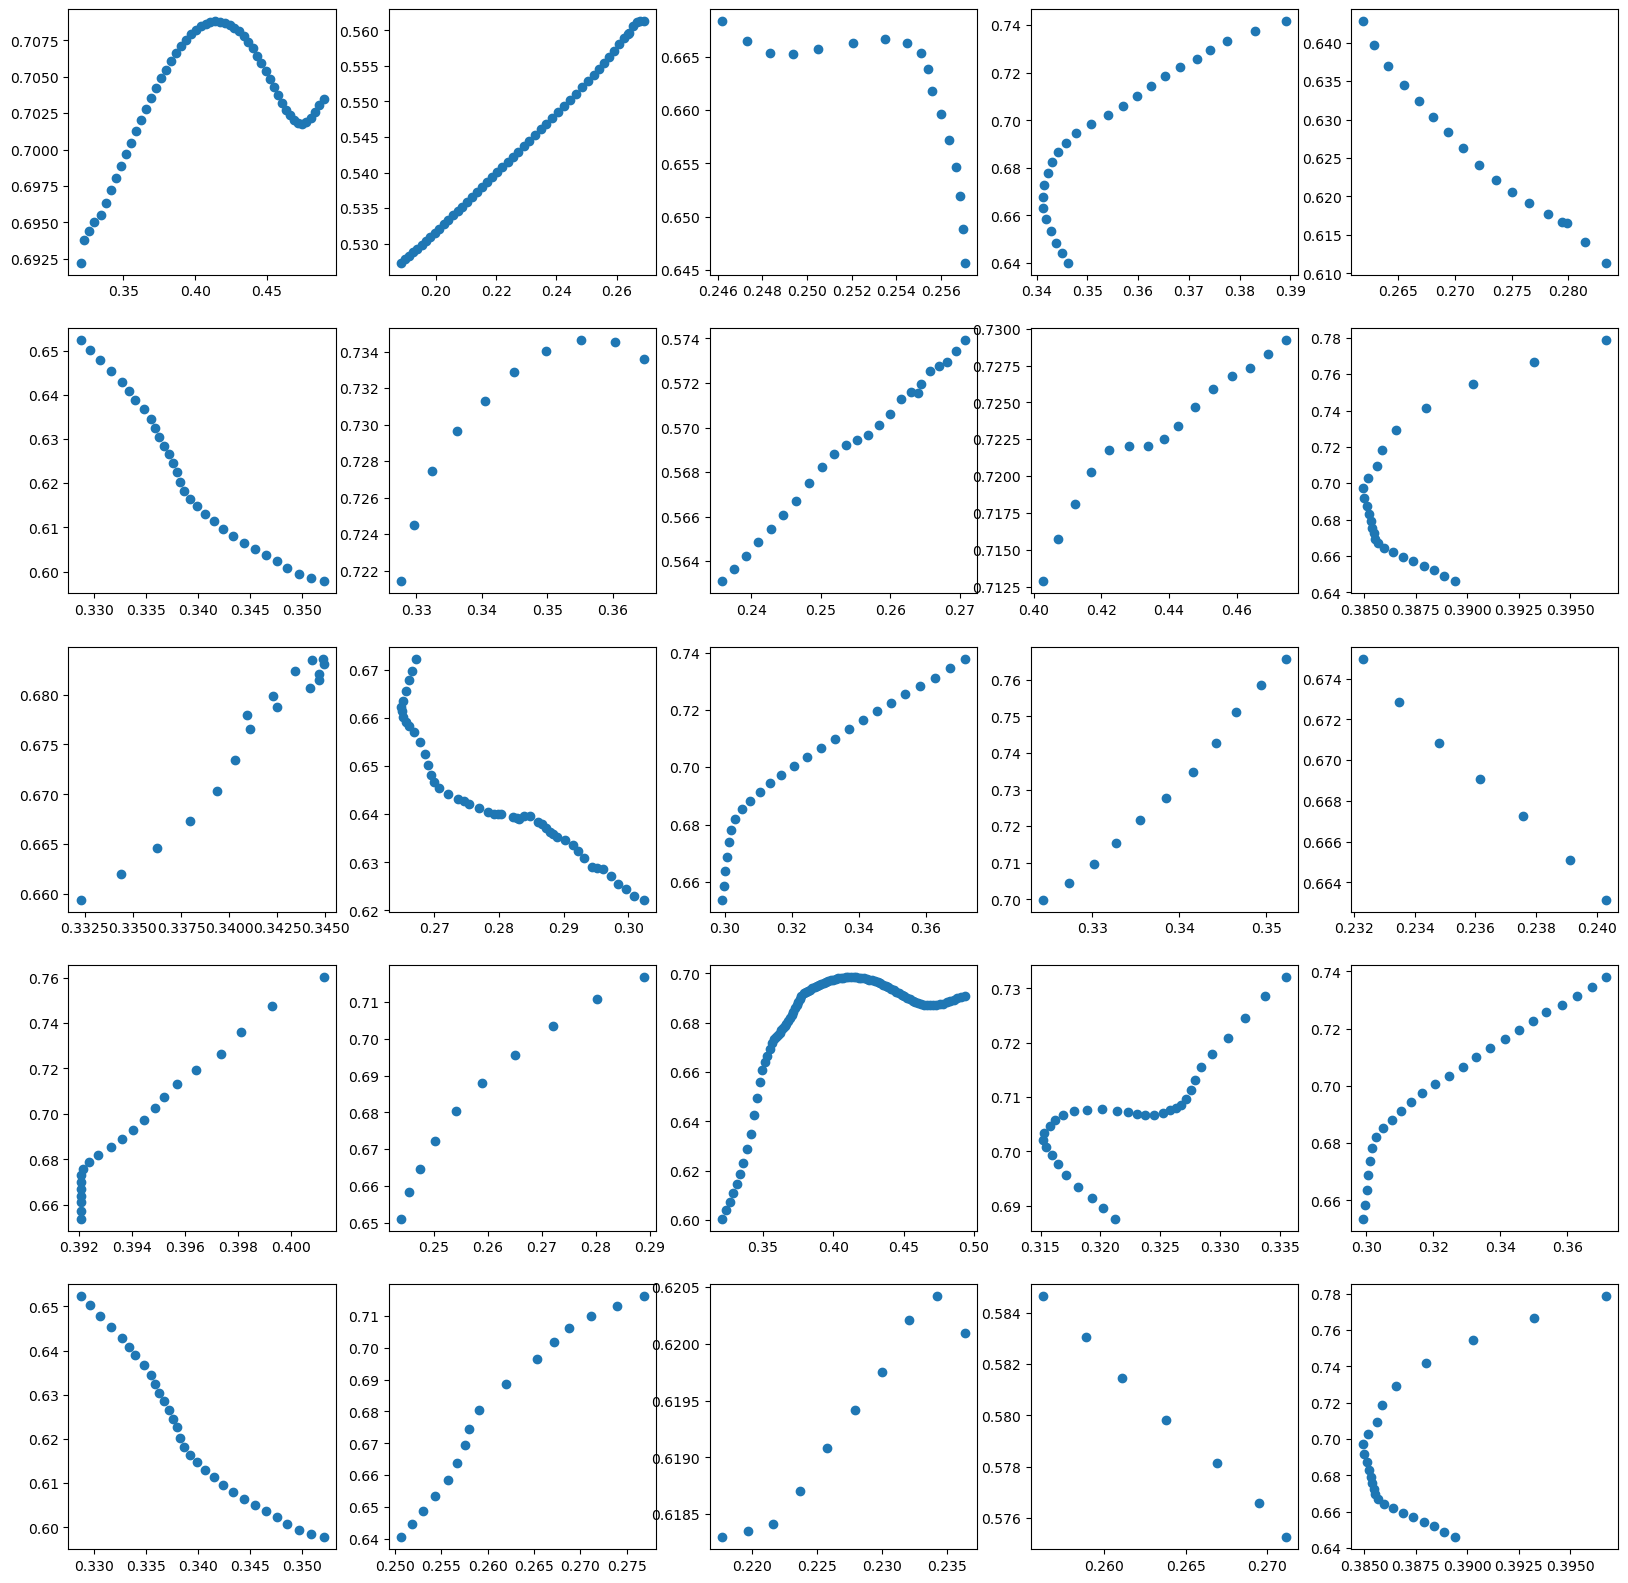

In [63]:
batch_size = 128
dl = DataLoader(train_dataset, batch_size=batch_size)
x, y = next(iter(dl))



fig, ax = plt.subplots(5, 5, figsize=(20, 20))

for i in range(5):
    for j in range(5):
        ind = np.random.randint(0, batch_size)
        ax[i, j].scatter(y[ind][0].numpy(), y[ind][1].numpy())


In [64]:
model = MLPL()

In [66]:
trainer = L.Trainer(accelerator="gpu", max_epochs=20)

/home/mila/m/mohit.anand/miniforge3/envs/forest_mssl/lib/python3.11/site-packages/lightning/fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /home/mila/m/mohit.anand/miniforge3/envs/forest_mssl ...
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/home/mila/m/mohit.anand/miniforge3/envs/forest_mssl/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/logger_connector/logger_connector.py:75: Starting from v1.9.0, `tensorboardX` has been removed as a dependency of the `lightning.pytorch` package, due to potential conflicts with other packages in the ML ecosystem. For this reason, `logger=True` will use `CSVLogger` as the default logger, unless the `tensorboard` or `tensorboardX` packages are found. Please `pip install lightning[extra]` or o

In [67]:
trainer.fit(model=model, train_dataloaders=train_dl, val_dataloaders=valid_dl)

Missing logger folder: /home/mila/m/mohit.anand/projects/TrackDiff/lightning_logs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/home/mila/m/mohit.anand/miniforge3/envs/forest_mssl/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "

  | Name  | Type | Params | Mode 
---------------------------------------
0 | model | MLP  | 3.0 M  | train
---------------------------------------
3.0 M     Trainable params
0         Non-trainable params
3.0 M     Total params
11.881    Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

In [30]:
y_list = []
y_hat_list = []

for i, batch in enumerate(val_loader):
    x,y = batch
    y_hat = model(x.cuda())
    y_list.append(y)
    y_hat_list.append(y_hat)

In [31]:
y_hat = torch.cat(y_hat_list, dim=0)

In [32]:
y_hat.shape

torch.Size([10801, 6, 200])

In [35]:
ind = 20
lon, lat = y_hat[ind][0,:20], y_hat[ind][1,:20]
lon = lon.cpu().detach().numpy()
lat = lat.cpu().detach().numpy()

In [36]:
data = go.Scatter(x=lon, y=lat, mode ="lines+markers", marker = dict(color = y[2,:], colorscale='jet', showscale=True))
fig = go.Figure(data=data)
fig.show()

In [39]:
y_hat.shape

torch.Size([10801, 6, 200])

In [45]:
points = y_hat[:5, :2, :20].cpu().detach().numpy()

In [49]:
d = np.diff(points, axis=2)

In [50]:
d.shape

(5, 2, 19)

In [51]:
dist = np.hypot(d[:,0,:], d[:,1,:])

In [52]:
dist.shape

(5, 19)